In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# problem 1
val = -3
n   = 5
s11 = pd.Series(val, index = 1 + np.arange(n))
print(s11)

dic = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
s12 = pd.Series(dic)
print("/n",s12)


1   -3
2   -3
3   -3
4   -3
5   -3
dtype: int64
/n Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64


In [3]:
# problem 2
#define the random walk function first
def rw(Nval, pval):
    s = np.zeros(Nval)
    s[1:] = np.random.binomial(1, pval, size = (Nval-1, ))*2 - 1
    s = pd.Series(s)
    s = s.cumsum()
    return(s)


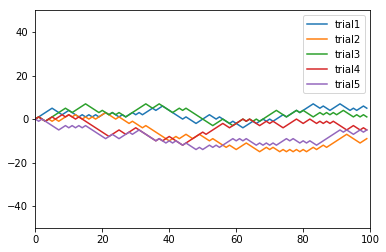

In [13]:
#create the five-line charts
d = {'trial1':rw(100,.5), 'trial2': rw(100,.5), 'trial3':rw(100,.5),'trial4':rw(100,.5),'trial5':rw(100,.5)}
df = pd.DataFrame(d)
fig = df.plot()
plt.ylim([-50, 50])
plt.xlim([0, 100])
plt.show()

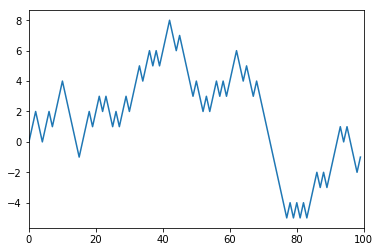

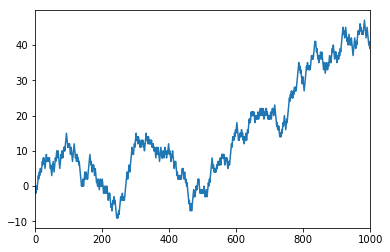

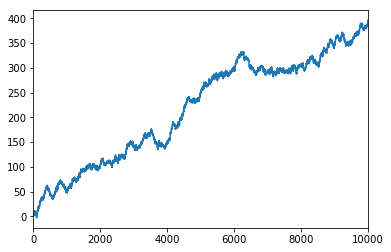

In [19]:
#create the biased random walk charts
df1 = rw(100, 0.51)
df2 = rw(1000, 0.51)
df3 = rw(10000, 0.51)

df1.plot()
plt.xlim([0, 100])
plt.show()

df2.plot()
plt.xlim([0, 1000])
plt.show()

df3.plot()
plt.xlim([0, 10000])
plt.show()

In [30]:
# problem 3
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']

studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})


studentInfo[(studentInfo['Age'] > 19) & (studentInfo['Sex'] == 'M')][['ID', 'Name']]
prob4result = pd.merge(studentInfo[studentInfo[('Sex')]== 'M'], otherInfo, on = 'ID', how = 'inner')[['ID', 'Age', 'GPA']]

In [31]:
prob4result

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4


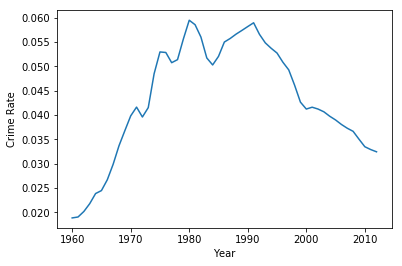

In [82]:
# problem 5
crime_data = pd.read_csv("crime_data.txt",header = 1, index_col = 0)
crime_data['Crime-Rate'] = pd.Series((crime_data['Total']/crime_data['Population']), index = crime_data.index)

# plotting the crime rate
cr_fig = plt.figure()
plt.plot(crime_data.index, crime_data['Crime-Rate'])
plt.xlabel('Year')
plt.ylabel('Crime Rate')

plt.show()

max5 = np.array(crime_data.sort_values(['Crime-Rate'], ascending=0).index[range(5)])
print("Five years with maximum crime rate: \n",max5)


Average total crimes between 1960 and 2012:  10638068.075471697
Average burglary crimes between 1960 and 2012:  2446286.2075471696
Years where total crime is below average while burglary is above average:  [1973 1974]


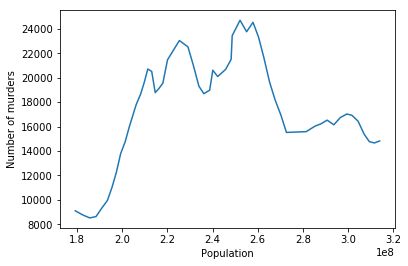

In [105]:
avg1 = crime_data[(crime_data.index>= 1960) & (crime_data.index <= 2012)]['Total'].mean()
print("Average total crimes between 1960 and 2012: " ,avg1)
avg2 = crime_data[(crime_data.index>= 1960) & (crime_data.index <= 2012)]['Burglary'].mean()
print("Average burglary crimes between 1960 and 2012: " ,avg2)

desiredindex = np.array(crime_data[(crime_data['Total'] < avg1) & (crime_data['Burglary'] > avg2)].index)
print("Years where total crime is below average while burglary is above average: " ,desiredindex)

pm_fig = plt.figure()
plt.plot(crime_data['Population'], crime_data['Murder'])
plt.xlabel('Population')
plt.ylabel('Number of murders')

plt.show()

In [111]:
crime_subdata = crime_data[(crime_data.index >= 1980) & (crime_data.index <= 1989)][['Population', 'Violent', 'Robbery']]
crime_subdata.to_csv("crime_subset.txt")


In [110]:
crime_subdata

,Population,Violent,Robbery
Year,,,
1980,225349264,1344520,565840
1981,229146000,1361820,592910
1982,231534000,1322390,553130
1983,233981000,1258090,506570
1984,236158000,1273280,485010
1985,238740000,1328800,497870
1986,240132887,1489169,542775
1987,242282918,1483999,517704
1988,245807000,1566220,542970
